In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from imblearn.over_sampling import *
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
df2 = pd.read_csv('train.csv')
df2['반입보세구역부호']

0         4077180
1         4002001
2        15002001
3         4002001
4         2002079
           ...   
89614     2006033
89615     2002079
89616     4106006
89617     4077009
89618     4002001
Name: 반입보세구역부호, Length: 89619, dtype: int64

In [4]:
df2 = pd.read_csv('train.csv')
import re
df2["HS10단위부호"] = df2["HS10단위부호"].apply(lambda x: re.findall("[0-9]{2}",str(x))[0])
df2["HS10단위부호"] = df2["HS10단위부호"].astype("int")
df2 = df2[['핵심적발','HS10단위부호']]
df2 = pd.get_dummies(df2,columns = ["HS10단위부호"])
df_y = df2['핵심적발']
df_x = df2.drop('핵심적발',axis=1)
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=42)
oversampling_instance = SMOTE(random_state=42)
x_train, y_train = oversampling_instance.fit_resample(x_train, y_train)

df_clt = DecisionTreeClassifier(max_depth=7)
df_clt.fit(x_train, y_train)
#df_clt.fit(x_train, y_train, verbose = True)
pred_train = df_clt.predict(x_train)
pred_test = df_clt.predict(x_test)

print('트레인 예측정확도: {0:.4f}'.format(accuracy_score(y_train,pred_train)))
print('테스트 예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred_test)))

MemoryError: Unable to allocate 448. MiB for an array with shape (7659, 7659) and data type float64

In [10]:
df2 = pd.read_csv('train.csv')
import re
df2["반입보세구역부호"] = df2["반입보세구역부호"].apply(lambda x: re.findall("[0-9]{3}",str(x))[0])
df2["반입보세구역부호"] = df2["반입보세구역부호"].astype("int")
df2 = df2[['핵심적발','반입보세구역부호']]
df2 = pd.get_dummies(df2,columns = ["반입보세구역부호"])
df_y = df2['핵심적발']
df_x = df2.drop('핵심적발',axis=1)
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=42)
oversampling_instance = RandomOverSampler(random_state=42)
x_train, y_train = oversampling_instance.fit_resample(x_train, y_train)

df_clt = DecisionTreeClassifier(max_depth=7)
df_clt.fit(x_train, y_train)
#df_clt.fit(x_train, y_train, verbose = True)
pred_train = df_clt.predict(x_train)
pred_test = df_clt.predict(x_test)

print('트레인 예측정확도: {0:.4f}'.format(accuracy_score(y_train,pred_train)))
print('테스트 예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred_test)))


트레인 예측정확도: 0.3849
테스트 예측정확도: 0.5723


In [7]:
df2 = pd.read_csv('train.csv')
from sklearn.tree import DecisionTreeClassifier
df2 = df2[['핵심적발','적출국가코드']]
df2 = pd.get_dummies(df2,columns = ["적출국가코드"])
df_y = df2['핵심적발']
df_x = df2.drop('핵심적발',axis=1)
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=42)
oversampling_instance = RandomOverSampler(random_state=42)
x_train, y_train = oversampling_instance.fit_resample(x_train, y_train)

df_clt = DecisionTreeClassifier()
df_clt.fit(x_train, y_train)
#df_clt.fit(x_train, y_train, verbose = True)
pred_train = df_clt.predict(x_train)
pred_test = df_clt.predict(x_test)

print('트레인 예측정확도: {0:.4f}'.format(accuracy_score(y_train,pred_train)))
print('테스트 예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred_test)))

트레인 예측정확도: 0.3565
테스트 예측정확도: 0.5314


In [11]:
df_x.keys()

Index(['반입보세구역부호_100', '반입보세구역부호_101', '반입보세구역부호_110', '반입보세구역부호_111',
       '반입보세구역부호_120', '반입보세구역부호_121', '반입보세구역부호_122', '반입보세구역부호_130',
       '반입보세구역부호_131', '반입보세구역부호_135', '반입보세구역부호_140', '반입보세구역부호_141',
       '반입보세구역부호_150', '반입보세구역부호_151', '반입보세구역부호_152', '반입보세구역부호_153',
       '반입보세구역부호_154', '반입보세구역부호_160', '반입보세구역부호_161', '반입보세구역부호_164',
       '반입보세구역부호_167', '반입보세구역부호_169', '반입보세구역부호_200', '반입보세구역부호_201',
       '반입보세구역부호_204', '반입보세구역부호_207', '반입보세구역부호_208', '반입보세구역부호_210',
       '반입보세구역부호_211', '반입보세구역부호_219', '반입보세구역부호_230', '반입보세구역부호_238',
       '반입보세구역부호_300', '반입보세구역부호_301', '반입보세구역부호_307', '반입보세구역부호_308',
       '반입보세구역부호_309', '반입보세구역부호_330', '반입보세구역부호_331', '반입보세구역부호_338',
       '반입보세구역부호_351', '반입보세구역부호_357', '반입보세구역부호_375', '반입보세구역부호_390',
       '반입보세구역부호_391', '반입보세구역부호_398', '반입보세구역부호_400', '반입보세구역부호_401',
       '반입보세구역부호_407', '반입보세구역부호_409', '반입보세구역부호_410', '반입보세구역부호_411',
       '반입보세구역부호_504', '반입보세구역부호_530', '반입보세구역부호_531', '반입보세구역부호_541',
      

In [19]:
df2 = pd.read_csv('train.csv')
from sklearn.tree import DecisionTreeClassifier
df2 = df2[['핵심적발','운송수단유형코드']]
df2 = pd.get_dummies(df2,columns = ["운송수단유형코드"])
df_y = df2['핵심적발']
df_x = df2.drop('핵심적발',axis=1)
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=42)
oversampling_instance = RandomOverSampler(random_state=42)
x_train, y_train = oversampling_instance.fit_resample(x_train, y_train)

df_clt = DecisionTreeClassifier(max_depth=7)
df_clt.fit(x_train, y_train)
#df_clt.fit(x_train, y_train, verbose = True)
pred_train = df_clt.predict(x_train)
pred_test = df_clt.predict(x_test)

print('트레인 예측정확도: {0:.4f}'.format(accuracy_score(y_train,pred_train)))
print('테스트 예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred_test)))

트레인 예측정확도: 0.3608
테스트 예측정확도: 0.4515


In [2]:
## 변수 전처리 과정 설명
## 우선 대부분의 범주형 변수는 코드이기 때문에 순서형 변수가 아닌 명목형 변수임으로 원 핫 인코딩 방식을 사용함.
## 연속형 변수에 경우 모두 오른쪽 꼬리가 긴 형태이기 때문에 로그변환을 해줌.
## 통관지 세관부호
df2['통관지세관부호'].value_counts()

40     35000
20     23933
30     11773
10      7641
16      4770
13      1736
33       547
53       389
62       271
12       269
39       258
140      249
41       244
80       241
21       224
131      177
121      167
70       155
17       153
130      148
151      140
23       137
82       133
122       94
150       85
37        79
50        75
56        72
14        71
154       61
100       55
54        54
153       38
110       37
81        35
152       29
120       28
90        27
71        24
Name: 통관지세관부호, dtype: int64

In [5]:
df2.groupby('통관지세관부호')['우범여부'].mean()

통관지세관부호
10     0.123937
12     0.479554
13     0.366935
14     0.492958
16     0.292453
17     0.666667
20     0.205825
21     0.517857
23     0.562044
30     0.239701
33     0.462523
37     0.670886
39     0.441860
40     0.187514
41     0.545082
50     0.480000
53     0.475578
54     0.648148
56     0.652778
62     0.505535
70     0.535484
71     0.625000
80     0.514523
81     0.514286
82     0.541353
90     0.518519
100    0.472727
110    0.486486
120    0.428571
121    0.508982
122    0.521277
130    0.567568
131    0.576271
140    0.506024
150    0.576471
151    0.621429
152    0.413793
153    0.736842
154    0.606557
Name: 우범여부, dtype: float64

In [ ]:
## 1. 통관지세관부호 변수를 관찰한 결과 통관지별로 우범률이 유의미하게 차이남.
## 2. 다만 1000개 이하의 표본을 가진 통관지세관부호는 값이 튈수 있다고 판단. 나머지 변수로써 묶어줌.

In [7]:
## 수입통관계획코드
df2['수입통관계획코드'].value_counts()

C    32336
D    31522
F     8498
E     8181
B     6773
Z     2145
H      164
Name: 수입통관계획코드, dtype: int64

In [9]:
df2.groupby('수입통관계획코드')['우범여부'].mean()

수입통관계획코드
B    0.098922
C    0.200922
D    0.209219
E    0.314631
F    0.296423
H    0.554878
Z    0.390210
Name: 우범여부, dtype: float64

In [ ]:
## 1. C : 보세구역 도착전신고(부두밖 또는 내륙지세관 통관희망물품)
## D : 보세구역장치후신고(부두밖 또는 내륙지세관 통관희망물품)
## E : 보세구역 도착전신고(부두내 직반출 희망물품)
## F : 보세구역 도착후신고(부두내 직반출 희망물품)
## H : 적하목록이 없는 물품 신고(휴대품)
## Z : 적하목록이 없는 물품 신고(선용품 등)
## 2. CD, EF, HZ 끼리 의미뿐만 아니라 값도 비슷해서 묶어줌. 조금 나는 값 차이는 오차라고 생각.
## (H와 Z는 값이 다소 차이나지만 Z의 표본수가 상대적으로 적어 값이 튀었다고 생각.)

In [10]:
## 수입거래구분코드
df2['수입거래구분코드'].value_counts()

11    53584
15    19875
94     6679
87     3205
91     3103
89      310
83      271
96      269
88      243
92      242
29      232
84      229
93      221
13      198
21      144
71      139
22      135
80      120
85       96
86       82
12       76
51       73
53       50
55       26
59       17
Name: 수입거래구분코드, dtype: int64

In [11]:
df2.groupby('수입거래구분코드')['우범여부'].mean()

수입거래구분코드
11    0.167830
12    0.578947
13    0.570707
15    0.240956
21    0.541667
22    0.459259
29    0.538793
51    0.684932
53    0.560000
55    0.576923
59    0.529412
71    0.482014
80    0.600000
83    0.546125
84    0.554585
85    0.552083
86    0.597561
87    0.356942
88    0.543210
89    0.490323
91    0.369320
92    0.537190
93    0.533937
94    0.298248
96    0.546468
Name: 우범여부, dtype: float64

In [ ]:
## 1. 1000개 이하의 샘플이 있는 수입거래구분코드는 나눠주는 것이 큰 의미가 없을거 같아서 묶음.
## 2. 87, 91번 코드의 우범여부값이 상당히 비슷해서 묶어줌.

In [12]:
## 수입종류코드
df2['수입종류코드'].value_counts()

21    81364
11     6406
26     1131
28      200
23      129
15      102
13       99
12       95
31       65
35       28
Name: 수입종류코드, dtype: int64

In [13]:
df2.groupby('수입종류코드')['우범여부'].mean()

수입종류코드
11    0.111302
12    0.589474
13    0.545455
15    0.598039
21    0.222002
23    0.682171
26    0.502210
28    0.630000
31    0.676923
35    0.357143
Name: 우범여부, dtype: float64

In [ ]:
## 1. 11번코드 일반-내수, 21번코드 일반-외화, 26번코드 우편, 나머지는 표본수가 작아서 묶어줌.

In [14]:
## 징수형태코드
df2['징수형태코드'].value_counts()

11    71361
43     5621
18     4360
21     2800
14     2385
0      2361
13      328
12      171
33      138
1        50
24       44
Name: 징수형태코드, dtype: int64

In [15]:
df2.groupby('징수형태코드')['우범여부'].mean()

징수형태코드
0     0.311732
1     0.680000
11    0.179888
12    0.619883
13    0.478659
14    0.423480
18    0.375000
21    0.405357
24    0.409091
33    0.500000
43    0.363992
Name: 우범여부, dtype: float64

In [ ]:
## 24은 21번과 의미도 유사하고 값도 비슷하므로 구분하는게 의미가 없어서 21번코드와 같은 취급을 해줌
## 12,33,1번 코드는 너무 표본 숫자가 적어 기타 코드로 묶어줌.

In [16]:
## 운송수단유형코드
df2['운송수단유형코드'].value_counts()

40    43517
10    42961
50     1404
30     1320
90      248
20      169
Name: 운송수단유형코드, dtype: int64

In [17]:
df2.groupby('운송수단유형코드')['우범여부'].mean()

운송수단유형코드
10    0.193455
20    0.585799
30    0.453030
40    0.229221
50    0.468661
90    0.572581
Name: 우범여부, dtype: float64

In [ ]:
## 30 - 차량, 50 - 우편 값도 유사하고 우편은 차량으로 결국 운송된다 생각해서 두 값을 동일한 값으로 묶어줌
## 90, 20은 표본이 부족해서 기타 코드로 묶어줌.

<AxesSubplot:>

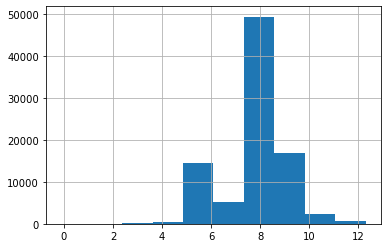

In [20]:
df2["신고중량(KG)"] = np.log(df2["신고중량(KG)"])
(df2['신고중량(KG)']).hist()

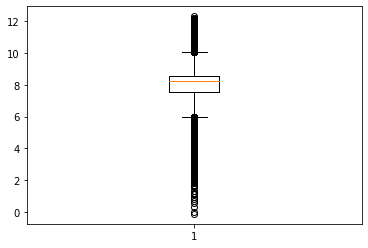

In [21]:
plt.boxplot(df2["신고중량(KG)"])
plt.show()

In [ ]:
## 극단값이 많은 분포임으로 이를 해결하기 위해 값을 임의로 조정했습니다.
## 10.9, 4.2를 기준으로 한 이유는 구간별 분포를 R로 심도깊게 확인하였습니다.

<ipython-input-24-42de1b3b86e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['관세율'][ df2['관세율'] < 1 ] = 0.1


<AxesSubplot:>

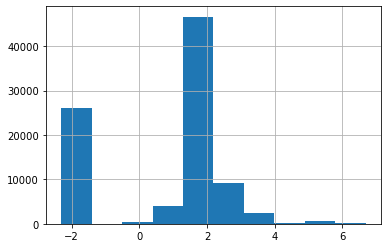

In [24]:
df2['관세율'][ df2['관세율'] < 1 ] = 0.1
df2["관세율"] = np.log(df2["관세율"])
(df2['관세율']).hist()

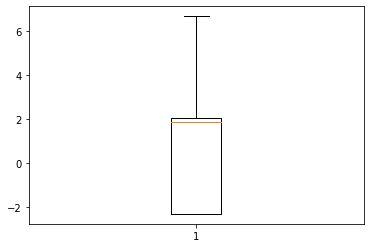

In [25]:
plt.boxplot(df2["관세율"])
plt.show()

In [ ]:
## 극단값이 많은 분포임으로 이를 해결하기 위해 값을 임의로 조정했습니다.
## 0은 로그를 취할수 없으므로 0.1로 조정했습니다.

<AxesSubplot:>

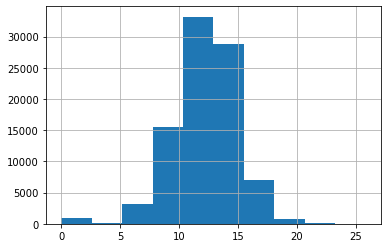

In [26]:
df2["과세가격원화금액"] = np.log1p(df2["과세가격원화금액"])
(df2['과세가격원화금액']).hist()

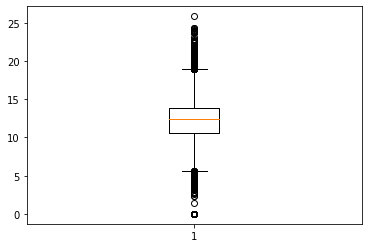

In [27]:
plt.boxplot(df2["과세가격원화금액"])
plt.show()

In [30]:
df2['우범여부'][ df2['과세가격원화금액'] == 0 ].count()

960

In [28]:
df2['우범여부'][ df2['과세가격원화금액'] == 0 ].mean()

0.19270833333333334

In [29]:
df2['우범여부'][(df2['과세가격원화금액'] < 8.2) & (df2["과세가격원화금액"] > 0)].mean()

0.2317753001715266

In [ ]:
## 초기 과세가격원화금액이 아에 0인값의 갯수가 어느정도 있으므로 이는 좀 특별하게 관찰해야 한다고 생각함.
## 0인값의 우범여부는 낮은값을, 0~8.2 사이 값은 과세가격원화금액의 평균값을 대입함.
## 이유는 과세가격원화금액이 클수록 우범여부가 증가하는 경향을 보였기 때문.

In [ ]:
## 신고인부호, 수입자부호, 해외거래처부호, 특송업체부호 변수는 같은 이름 또는 같은 업체에 동 기간 내 처리된 갯수를
## 변수로 사용했을때 공통적으로 더 많은 거래량이 있는 이름 또는 업체에 경우 우범여부가 감소하는 경향이 있음
## 이는 R로 관찰했기 때문에 R코드를 따로 첨부합니다.

In [ ]:
## 다음으로 모델선정 기준에 대해 설명하겠습니다.

In [31]:
#트레인 데이터 전처리
df2 = pd.read_csv('train.csv')



#df2.groupby('통관지세관부호').size()
df2['통관지세관부호'][ df2['통관지세관부호'] == 10 ] = 1
df2['통관지세관부호'][ df2['통관지세관부호'] == 40 ] = 2
df2['통관지세관부호'][ df2['통관지세관부호'] == 20 ] = 3
df2['통관지세관부호'][ df2['통관지세관부호'] == 30 ] = 4
df2['통관지세관부호'][ df2['통관지세관부호'] == 16 ] = 5
df2['통관지세관부호'][ df2['통관지세관부호'] == 13 ] = 6
df2['통관지세관부호'][ df2['통관지세관부호'] > 7] = 7

#신고인부호
size1 = df2.groupby('신고인부호').size()
size = size1[df2['신고인부호']].reset_index(drop=True)
df2['신고인부호'] = size
df2['신고인부호'] = np.log1p(df2['신고인부호'])

#수입자부호
su = set(df2['수입자부호'])
df2['수입자부호'].fillna('No', inplace= True)
size2 = df2.groupby('수입자부호').size()
size = size2[df2['수입자부호']].reset_index(drop=True)
df2['수입자부호'] = size
df2['수입자부호'] = np.log1p(df2['수입자부호'])

#해외거래처부호
ha = set(df2['해외거래처부호'])
df2['해외거래처부호'].fillna('No', inplace= True)
size3 = df2.groupby('해외거래처부호').size()
size = size3[df2['해외거래처부호']].reset_index(drop=True)
df2['해외거래처부호'] = size
df2['해외거래처부호'] = np.log1p(df2['해외거래처부호'])


#특송업체부호
df2['특송업체부호'].fillna('No', inplace= True)
size4 = df2.groupby('특송업체부호').size()
size = size4[df2['특송업체부호']].reset_index(drop=True)
df2['특송업체부호'] = size
df2['특송업체부호'] = np.log1p(df2['특송업체부호'])

#수입통관계획코드
df2['수입통관계획코드'][ df2['수입통관계획코드'].isin(['C','D']) ] = 'CD'
df2['수입통관계획코드'][ df2['수입통관계획코드'].isin(['E','F']) ] = 'EF'
df2['수입통관계획코드'][ df2['수입통관계획코드'].isin(['H','Z']) ] = 'HZ'

#수입신고구분코드 
#df2['수입신고구분코드'][ df2['수입신고구분코드'].isin(['D','E']) ] = 'DE'

#수입거래구분코드
df2['수입거래구분코드'][ df2['수입거래구분코드'] == 11 ] = 1
df2['수입거래구분코드'][ df2['수입거래구분코드'] == 15 ] = 2
df2['수입거래구분코드'][ df2['수입거래구분코드'] == 94 ] = 3
df2['수입거래구분코드'][ df2['수입거래구분코드'].isin([87,91]) ] = 4
df2['수입거래구분코드'][ df2['수입거래구분코드'] > 5 ] = 5

#수입종류코드
df2['수입종류코드'][ df2['수입종류코드'] == 11 ] = 1
df2['수입종류코드'][ df2['수입종류코드'] == 21 ] = 2
df2['수입종류코드'][ df2['수입종류코드'] == 26 ] = 3
df2['수입종류코드'][ df2['수입종류코드'] > 4 ] = 4

#징수형태코드
df2['징수형태코드'][ df2['징수형태코드'] == 24 ] = 21
df2['징수형태코드'][ df2['징수형태코드'].isin([1,12,33]) ] = 99

#신고중량KG
#scaler = RobustScaler()
#scaler = MinMaxScaler()
#df2["신고중량(KG)"][df2["신고중량(KG)"] > 45000] = 45000
#df2["신고중량(KG)"][df2["신고중량(KG)"] < 200] = 200
#df2["신고중량(KG)"] = scaler.fit_transform(df2["신고중량(KG)"].to_numpy().reshape(-1,1))
df2["신고중량(KG)"] = np.log(df2["신고중량(KG)"])
df2["신고중량(KG)"][df2["신고중량(KG)"] > 10.9] = 11
df2["신고중량(KG)"][df2["신고중량(KG)"] < 4.2] = 4


#과세가격원화금액                
#df2['과세가격원화금액'][ df2['과세가격원화금액'] < 1 ] = 1
df2['과세가격원화금액'] = np.log1p(df2['과세가격원화금액'])

#df2['과세가격원화금액'][ df2['과세가격원화금액'] < 8.2 ] = df2['과세가격원화금액'].mean()
#print(df2['과세가격원화금액'].mean()) # 12.145
df2['과세가격원화금액'][ (df2['과세가격원화금액'] < 8.2) & (df2["과세가격원화금액"] > 0)] = 12.145#df2['과세가격원화금액'].mean()
df2['과세가격원화금액'][ df2['과세가격원화금액'] == 0 ] = 8
df2['과세가격원화금액'][ df2['과세가격원화금액'] > 19 ] = 19


#운송수단유형코드
df2['운송수단유형코드'][ df2['운송수단유형코드'] == 10 ] = 1
df2['운송수단유형코드'][ df2['운송수단유형코드'] == 40 ] = 2
df2['운송수단유형코드'][ df2['운송수단유형코드'].isin([30,50]) ] = 3
df2['운송수단유형코드'][ df2['운송수단유형코드'] > 4 ] = 4


#관세율
#df2["관세율"] = df2["관세율"].astype('float')
df2['관세율'][ df2['관세율'] < 1 ] = 0.1
df2['관세율'] = np.log1p(df2['관세율'])
df2['관세율'][ df2['관세율'] > 5 ] = 5
df2 = pd.get_dummies(df2,columns = ['수입통관계획코드','징수형태코드','수입신고구분코드',
                                    '운송수단유형코드', '통관지세관부호', #'신고중량(KG)',
                                    '수입거래구분코드','수입종류코드'])

<ipython-input-31-a107ebcded54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['통관지세관부호'][ df2['통관지세관부호'] == 10 ] = 1
<ipython-input-31-a107ebcded54>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['통관지세관부호'][ df2['통관지세관부호'] == 40 ] = 2
<ipython-input-31-a107ebcded54>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['통관지세관부호'][ df2['통관지세관부호'] == 20 ] = 3
<ipython-input-31-a107ebcded54>:10: SettingWithCopyWarning: 
A valu

In [32]:
#모델적합, 연습할때 
df_y = df2['핵심적발']
df_x = df2[['통관지세관부호_1','통관지세관부호_2','통관지세관부호_3','통관지세관부호_4','통관지세관부호_5','통관지세관부호_6',
             '통관지세관부호_7', '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호',
             '수입거래구분코드_1', '수입거래구분코드_2', '수입거래구분코드_3', '수입거래구분코드_4', '수입거래구분코드_5',
             '수입종류코드_1', '수입종류코드_2', '수입종류코드_3', '수입종류코드_4', '운송수단유형코드_1',
             '운송수단유형코드_2', '운송수단유형코드_3', '운송수단유형코드_4', '수입통관계획코드_B', '수입통관계획코드_CD',
             '수입통관계획코드_EF', '수입통관계획코드_HZ', '징수형태코드_0', '징수형태코드_11', '징수형태코드_13',
             '징수형태코드_14', '징수형태코드_18', '징수형태코드_21', '징수형태코드_43', '징수형태코드_99',
             '수입신고구분코드_A', '수입신고구분코드_B', '수입신고구분코드_D', '수입신고구분코드_E',
             '신고중량(KG)','과세가격원화금액','관세율']]

x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=42)
oversampling_instance = RandomOverSampler(random_state=42)
x_train, y_train = oversampling_instance.fit_resample(x_train, y_train)

def printt(pred):
    print('예측정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))
    print('정밀도: {0:.4f}'.format(precision_score(y_test,pred)))
    print('재현율: {0:.4f}'.format(recall_score(y_test,pred)))
    print('f1: {0:.4f}'.format(f1_score(y_test,pred)))
def printt2(test,pred):
    print('예측정확도: {0:.4f}'.format(accuracy_score(test,pred)))
    print('정밀도: {0:.4f}'.format(precision_score(test,pred,average='macro')))
    print('재현율: {0:.4f}'.format(recall_score(test,pred,average='macro')))
    f11 = f1_score(test,pred,average='macro')
    print('f1: {0:.4f}'.format(f11))
    a = confusion_matrix(test,pred)
    tp = a[1][1] + a[1][2] + a[2][1] + a[2][2]
    fp = a[0][1] + a[0][2]
    fn = a[1][0] + a[2][0]
    pre = tp / (fp + tp)
    re = tp / (fn + tp)
    f1 = 2 * pre * re / (pre + re)
    print('정밀도: {0:.4f}'.format(pre))
    print('재현율: {0:.4f}'.format(re))
    print('f1: {0:.4f}'.format(f1))
    print(a)

In [ ]:
## RandomOverSampler을 사용한 이유는 우범여부숫자가 너무 적기 때문에 갯수를 맞춰주기 위해 오버샘플링을 했습니다.
## 원핫인코딩을 많이 했기때문에 SMOTE을 사용하는 것보단 RandomOverSampler을 사용하는 것이 적절한거 같아서 사용했습니다.

In [33]:
df_clt = DecisionTreeClassifier(max_depth=7, random_state=42)
df_clt.fit(x_train, y_train)

pred = df_clt.predict(x_test)
printt2(y_test,pred)

예측정확도: 0.5847
정밀도: 0.4319
재현율: 0.4796
f1: 0.4207
정밀도: 0.3827
재현율: 0.7910
f1: 0.5158
[[8855 2006 3078]
 [ 430  507  963]
 [ 403  563 1119]]


In [36]:
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_train, y_train)
pred3 = rf_clf.predict(x_test)
printt2(y_test,pred3)

예측정확도: 0.7676
정밀도: 0.4581
재현율: 0.3880
f1: 0.3918
정밀도: 0.5725
재현율: 0.2020
f1: 0.2986
[[13338   215   386]
 [ 1559   112   229]
 [ 1621   155   309]]


In [37]:
ada_clf = AdaBoostClassifier(n_estimators = 100)
ada_clf.fit(x_train, y_train)
pred4 = ada_clf.predict(x_test)
printt2(y_test,pred4)

예측정확도: 0.6360
정밀도: 0.4531
재현율: 0.5046
f1: 0.4554
정밀도: 0.4271
재현율: 0.7819
f1: 0.5525
[[9760 2095 2084]
 [ 457  581  862]
 [ 412  614 1059]]


In [38]:
lf = LogisticRegression(random_state=42)
lf.fit(x_train, y_train)
pred6 = lf.predict(x_test)
printt2(y_test,pred6)

예측정확도: 0.6345
정밀도: 0.4455
재현율: 0.4946
f1: 0.4482
정밀도: 0.4191
재현율: 0.7508
f1: 0.5379
[[9792 2052 2095]
 [ 511  502  887]
 [ 482  525 1078]]


C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from lightgbm import LGBMClassifier 
lgbm_wrapper = LGBMClassifier(n_estimators = 250, objective = "multiclass", metric = "multi_logloss",boosting_type = "gbdt",
                              #objective = "multiclass", metric = "multi_logloss"
                              #objective = "binary", metric = "binary_logloss"
                              learning_rate = 0.008,  num_leaves = 80, n_jobs = -1, min_child_samples = 28,
                              colsample_bytree = 0.3, reg_lambda = 39, #reg_alpha = 30, subsample =  0.3,                           
                              max_depth = 12,boost_from_average = False,random_state=42)
lgbm_wrapper.fit(x_train, y_train, verbose = True)
pred = lgbm_wrapper.predict(x_test)
printt2(y_test,pred)

예측정확도: 0.6391
정밀도: 0.4571
재현율: 0.5145
f1: 0.4601
정밀도: 0.4285
재현율: 0.7882
f1: 0.5551
[[9749 1914 2276]
 [ 439  557  904]
 [ 405  531 1149]]


In [40]:
pred = lgbm_wrapper.predict(x_test)
printt2(y_test,pred)
pred = lgbm_wrapper.predict(x_train)
printt2(y_train,pred)

예측정확도: 0.6391
정밀도: 0.4571
재현율: 0.5145
f1: 0.4601
정밀도: 0.4285
재현율: 0.7882
f1: 0.5551
[[9749 1914 2276]
 [ 439  557  904]
 [ 405  531 1149]]
예측정확도: 0.6500
정밀도: 0.6529
재현율: 0.6500
f1: 0.6471
정밀도: 0.8477
재현율: 0.8108
f1: 0.8289
[[39612  7373  8912]
 [11693 29589 14615]
 [ 9454  6653 39790]]


In [ ]:
## 다양한 모델을 실험해 보았을때 LightGBM 모델이 실행속도도 빨리 나오기 때문에 하이퍼 파라미터를 튜닝하는데 유리합니다.
## 또 F1값이 가장 크기 때문에 LightGBM 모델을 선택했습니다.
## LightGBM 모델을 선택한 후 하이퍼파라미터 값은 조원들과 일일이 대입하여 높은 값이 나오는 하이퍼 파라미터 값을 사용했습니다.
## 최적의 max_depth - learning_rate을 먼저 찾고 나머지 파라미터 값을 찾았습니다.
## 그리고 test데이터 예측정확도와 train데이터 예측정확도를 비교해 과대적합을 방지하기위해 노력했습니다.
## 이를 위해 과대적합을 규제하는 하이퍼 파라미터를 조정했습니다.
## 다만 이 테스터 데이터에만 지나치게 적합된 하이퍼 파라미터값을 선택한 것 같습니다.